## Create Figure 1

Authors: Mattes Warning, Friederike Moroff

In [69]:
import numpy as np
import pandas as pd

from tueplots import bundles
from matplotlib import pyplot as plt

In [70]:
# Read data
data = pd.read_csv("../../dat/preprocessed_brca_metabric_clinical_data.tsv", sep='\t')

# Age groups for 5 year but below 35 and above 85 will be in one group
bins = [0, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, float('inf')]  # Define the age bins
labels = [1,2,3,4,5,6,7,8,9,10,11,12]
labels_2 = ['$<$35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '$\ge$85']
data['Age Groups'] = pd.cut(data['Age at Diagnosis'], bins=bins, labels=labels, right=False)

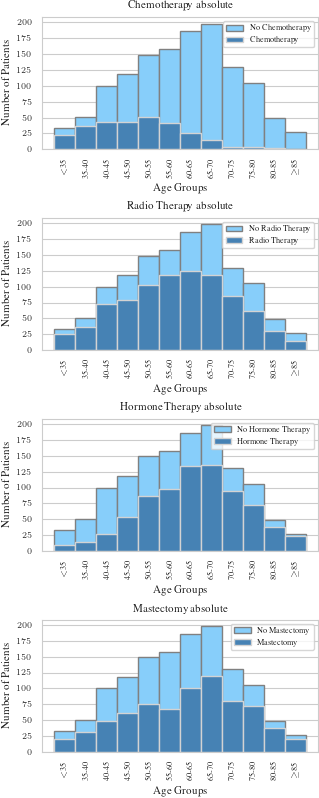

In [72]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=4, ncols=1))
fig, ax = plt.subplots(4,1)
for i, therapy in enumerate(['Chemotherapy', 'Radio Therapy', 'Hormone Therapy', 'Type of Breast Surgery']):
    
    # Get patients that got therapy
    df = data[data[therapy+' Binary'] == 1]
    
    # Rename therapy for Surgery
    if therapy == 'Type of Breast Surgery':
        therapy = 'Mastectomy'
    
    # Get axis element    
    axis = ax[i]
    
    # Plot bars that show total number of patients per age group
    axis.bar(np.arange(1, 13), data.groupby('Age Groups', observed=False).size(), width=1, color='lightskyblue',edgecolor='grey', label='No '+therapy)
    
    # Plot bars that show number of patients that got the specific therapy per age group
    axis.bar(np.arange(1, 13), df.groupby('Age Groups', observed=False).size(), width=1, color='steelblue',edgecolor='lightgrey', label=therapy)
    
    
    axis.set_xticks(np.arange(1, 13), labels_2, rotation=90)
    axis.set_yticks(np.arange(0,225,25))
    axis.set_xlabel('Age Groups')
    axis.set_ylabel('Number of Patients')
    axis.grid(axis='x')
    axis.set_title(therapy+' absolute')
    axis.legend(loc='upper right')
    
plt.savefig('fig_TherapyDistribution.pdf')    
plt.show()
